<a href="https://colab.research.google.com/github/scottspurlock/csc4422-s2026/blob/main/labs/day04_lab_spurlock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DMML Day 4 Lab: Cleaning
## Scott Spurlock
### 2/12/2026

In this lab, we will practice using the Pandas library to clean data. We'll be working with New Orleans Airbnb data.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://drive.google.com/uc?export=download&id=188KEzPVgJTWFT093EyrfREYJsCKfEBvB'
df = pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,19091.0,Fully Furnished Cozy Apartment,72880,John,NaN,Leonidas,29.96100,-90.11950,Entire home/apt,60,1,497,4/4/2022,3.29,1,122,30,"20-RSTR-27040, 20-OSTR-00105"
1,71624.0,Ravenwood Manor (Historic Bywater),367223,Susan,NaN,Bywater,29.96153,-90.04364,Entire home/apt,150,3,271,9/5/2022,1.92,1,321,31,"21-RSTR-18609, 20-OSTR-31018"
2,74498.0,Maison Marais 1: Large Local Living,391462,Georgia,NaN,St. Roch,29.96986,-90.05172,Entire home/apt,93,3,553,9/4/2022,3.95,3,202,40,"Exempt: This listing is a licensed hotel, mote..."
3,79536.0,FeelAtHomeInNO PrivateApt,428362,Miriam,NaN,Seventh Ward,29.97803,-90.07450,Entire home/apt,69,3,580,8/23/2022,4.19,1,29,67,"21-RSTR-18550, 21-OSTR-18392"
4,79609.0,Moon Over Mazant - FIRST and FINEST in Bywater!,428909,Stephen,NaN,St. Claude,29.96448,-90.03667,Private room,111,3,438,9/5/2022,3.13,1,244,44,"19STR-20697, 20-OSTR-24055"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6927 entries, 0 to 6926
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6927 non-null   float64
 1   name                            6927 non-null   object 
 2   host_id                         6927 non-null   int64  
 3   host_name                       6895 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6927 non-null   object 
 6   latitude                        6927 non-null   float64
 7   longitude                       6927 non-null   float64
 8   room_type                       6927 non-null   object 
 9   price                           6927 non-null   int64  
 10  minimum_nights                  6927 non-null   int64  
 11  number_of_reviews               6927 non-null   int64  
 12  last_review                     61

## Drop unneeded/unhelpful columns.

In [3]:
# drop unhelpful columns
df = df.drop(['id', 'neighbourhood_group'], axis=1)
df.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,Fully Furnished Cozy Apartment,72880,John,Leonidas,29.96100,-90.11950,Entire home/apt,60,1,497,4/4/2022,3.29,1,122,30,"20-RSTR-27040, 20-OSTR-00105"
1,Ravenwood Manor (Historic Bywater),367223,Susan,Bywater,29.96153,-90.04364,Entire home/apt,150,3,271,9/5/2022,1.92,1,321,31,"21-RSTR-18609, 20-OSTR-31018"
2,Maison Marais 1: Large Local Living,391462,Georgia,St. Roch,29.96986,-90.05172,Entire home/apt,93,3,553,9/4/2022,3.95,3,202,40,"Exempt: This listing is a licensed hotel, mote..."
3,FeelAtHomeInNO PrivateApt,428362,Miriam,Seventh Ward,29.97803,-90.07450,Entire home/apt,69,3,580,8/23/2022,4.19,1,29,67,"21-RSTR-18550, 21-OSTR-18392"
4,Moon Over Mazant - FIRST and FINEST in Bywater!,428909,Stephen,St. Claude,29.96448,-90.03667,Private room,111,3,438,9/5/2022,3.13,1,244,44,"19STR-20697, 20-OSTR-24055"


## Handle missing values.

### For the license column, update any NaN values to be the string “None”.


In [4]:
df['license'] = df['license'].fillna('None')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6927 entries, 0 to 6926
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            6927 non-null   object 
 1   host_id                         6927 non-null   int64  
 2   host_name                       6895 non-null   object 
 3   neighbourhood                   6927 non-null   object 
 4   latitude                        6927 non-null   float64
 5   longitude                       6927 non-null   float64
 6   room_type                       6927 non-null   object 
 7   price                           6927 non-null   int64  
 8   minimum_nights                  6927 non-null   int64  
 9   number_of_reviews               6927 non-null   int64  
 10  last_review                     6174 non-null   object 
 11  reviews_per_month               6174 non-null   float64
 12  calculated_host_listings_count  69

### For the last_review column, it looks like some listings have never been reviewed. This leads reviews_per_month to be null as well. Let’s fix both issues by dropping rows where there is no review.

In [5]:
display(df[df['last_review'].isna()])
df = df.dropna(subset=['last_review'])
df.info()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
42,studio unit 3 New Orleans,103427,Jacqueline M,Lower Garden District,29.933960,-90.080660,Entire home/apt,257,2,0,NaN,NaN,3,90,0,"Exempt: This listing is a licensed hotel, mote..."
76,Rent whole Townhouse in Uptown,4805726,Adam,Uptown,29.932760,-90.102650,Entire home/apt,1000,30,0,NaN,NaN,1,0,0,None
152,Cottage in Gentilly Terrace,8626766,Jeanne,Gentilly Terrace,30.006700,-90.053240,Entire home/apt,90,30,0,NaN,NaN,1,0,0,17STR-06952
243,B&B on world famous Frenchmen St.,15433610,Emily,Marigny,29.964280,-90.057110,Private room,178,2,0,NaN,NaN,1,0,0,"Exempt: This listing is a licensed hotel, mote..."
244,"Uptown Gem, Amazing Location!",15474674,Anne,Audubon,29.922640,-90.125700,Entire home/apt,900,30,0,NaN,NaN,1,365,0,17STR-09236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,Luxe Home Away From Home for Extended Stays,406659943,Trish,Tall Timbers - Brechtel,29.890390,-90.012662,Entire home/apt,168,30,0,NaN,NaN,1,365,0,None
6893,Lovely 1 bedroom unit with free parking on pre...,71998202,Talyta & Kaio,Lower Ninth Ward,29.960218,-90.005083,Entire home/apt,81,2,0,NaN,NaN,3,11,0,None
6915,Prized NOLA 2BD+ Sun Home in a Phenomenal Loca...,293262674,Reddy,Leonidas,29.963310,-90.140940,Entire home/apt,75,30,0,NaN,NaN,2,283,0,None
6917,Light and bright Free Standing Apartment,5154893,Leila,Holy Cross,29.956330,-90.005960,Entire home/apt,189,1,0,NaN,NaN,12,90,0,None


<class 'pandas.core.frame.DataFrame'>
Index: 6174 entries, 0 to 6926
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            6174 non-null   object 
 1   host_id                         6174 non-null   int64  
 2   host_name                       6145 non-null   object 
 3   neighbourhood                   6174 non-null   object 
 4   latitude                        6174 non-null   float64
 5   longitude                       6174 non-null   float64
 6   room_type                       6174 non-null   object 
 7   price                           6174 non-null   int64  
 8   minimum_nights                  6174 non-null   int64  
 9   number_of_reviews               6174 non-null   int64  
 10  last_review                     6174 non-null   object 
 11  reviews_per_month               6174 non-null   float64
 12  calculated_host_listings_count  6174 no

### It looks like only one host has not provided a name. Let’s fix this by updating all the rows for this particular host to be “Anonymous”.

In [6]:
df['host_name'] = df['host_name'].fillna('Anonymous')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6174 entries, 0 to 6926
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            6174 non-null   object 
 1   host_id                         6174 non-null   int64  
 2   host_name                       6174 non-null   object 
 3   neighbourhood                   6174 non-null   object 
 4   latitude                        6174 non-null   float64
 5   longitude                       6174 non-null   float64
 6   room_type                       6174 non-null   object 
 7   price                           6174 non-null   int64  
 8   minimum_nights                  6174 non-null   int64  
 9   number_of_reviews               6174 non-null   int64  
 10  last_review                     6174 non-null   object 
 11  reviews_per_month               6174 non-null   float64
 12  calculated_host_listings_count  6174 no

###  Fix data type issues by making sure all columns are set to the appropriate types.
The availability_365 column will need some cleaning first.


In [7]:
mask = df['availability_365'].str.isnumeric()
df.loc[~mask, 'availability_365'].value_counts()

,count
availability_365,
unavailable,9
year round,2
every day,1
yes,1
24/7,1
-5,1
-7,1


In [8]:
# impute either 0 or 365

# Option 1
# use loc and masks:
# mask = df['availability_365'] == 'unavailable'
# df.loc[mask, 'availability_365'] = 0

# Option 2a
# or use replace:
#df['availability_365'] = df['availability_365'].replace('unavailable', 0)

# Option 2b
# replace can take a list
#df['availability_365'] = df['availability_365'].replace(['year round', 'every day', '24/7', 'yes'], 365)

# Option 2c
# replace can take a dictionary
df['availability_365'] = df['availability_365'].replace({
'unavailable' : 0,
'year round' : 365,
'every day' : 365,
'yes' : 365,
'24/7' : 365
})

# Option 3
# or you could roll your own cleaning function
def convert_avail(avail):
  if (avail == 'unavailable'):
    return '0'
  elif (avail in ['year round', 'yes', 'every day', '24/7']):
    return '365'
  else:
    return avail

df['availability_365'] = df['availability_365'].apply(convert_avail)

# -------------------------------
# finally cast to numeric
df ['availability_365'] = pd.to_numeric(df['availability_365'])

# Only keep rows with positive numbers
df = df[df['availability_365'] >= 0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6172 entries, 0 to 6926
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            6172 non-null   object 
 1   host_id                         6172 non-null   int64  
 2   host_name                       6172 non-null   object 
 3   neighbourhood                   6172 non-null   object 
 4   latitude                        6172 non-null   float64
 5   longitude                       6172 non-null   float64
 6   room_type                       6172 non-null   object 
 7   price                           6172 non-null   int64  
 8   minimum_nights                  6172 non-null   int64  
 9   number_of_reviews               6172 non-null   int64  
 10  last_review                     6172 non-null   object 
 11  reviews_per_month               6172 non-null   float64
 12  calculated_host_listings_count  6172 no

### Check for outliers by displaying summary statistics for each column. (Remember how to read scientific notation, e.g., 3.650000e+02 is 365.)


In [9]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.172000e+03,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000
mean,1.427592e+08,29.958052,-90.073486,191.969540,7.959981,67.693454,1.855324,19.946047,169.929520,18.455282
std,1.359134e+08,0.024346,0.031636,273.979436,15.590371,86.152731,1.822916,51.508061,125.387653,22.426193
min,9.710000e+02,29.866920,-90.151131,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,2.904696e+07,29.941343,-90.089742,91.000000,1.000000,10.000000,0.670000,1.000000,61.000000,2.000000
50%,1.030462e+08,29.958100,-90.073090,131.000000,2.000000,36.000000,1.490000,2.000000,149.000000,12.000000
75%,2.237281e+08,29.969830,-90.061920,213.000000,3.000000,94.000000,2.560000,12.000000,300.000000,28.000000
max,4.759640e+08,30.180670,-89.722060,10000.000000,365.000000,933.000000,58.770000,258.000000,365.000000,444.000000


### Add a text cell to discuss your observations of the range of values for price based on the summary statistics and histogram. Include a plan for how you will handle outliers and why. No need to write the code; just make a plan.

Text(0.5, 1.0, 'Histogram of price')

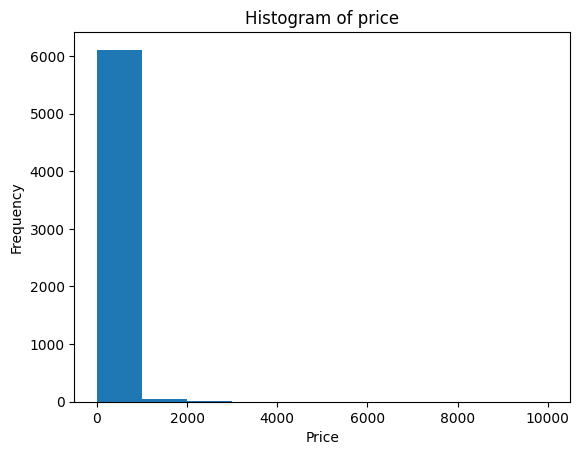

In [10]:
plt.hist(df['price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of price')

When some bars are much higher than others, it's hard to read.

Solution: use log scale

Text(0.5, 1.0, 'Histogram of price (log scale)')

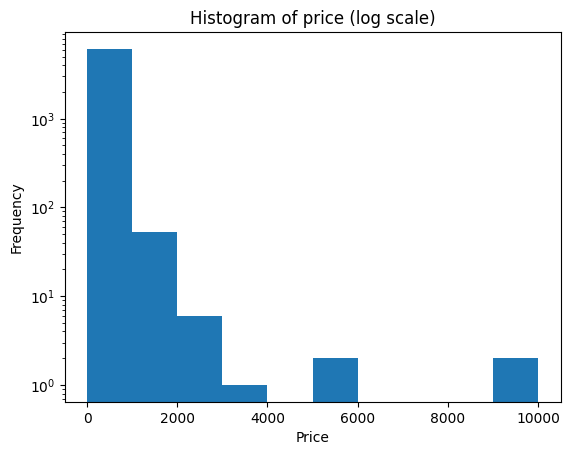

In [11]:
plt.hist(df['price'], bins=10, log=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of price (log scale)')

Investigate high prices

In [12]:
df[df['price'] > 5000]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
4047,Downtown New Orleans Historic Charm! Walk to FQ,93771277,Jane,Central Business District,29.95059,-90.06741,Entire home/apt,10000,199,3,10/4/2020,0.13,11,3,0,"20str-20614, 20-ostr-1010"
4222,Penthouse Suite in Downtown New Orleans 2 Min ...,93771277,Jane,Central Business District,29.94957,-90.06847,Entire home/apt,10000,199,18,7/29/2021,0.83,11,4,0,"20STR-33512, 19-ostr-0102"


In [13]:
df[df['price'] < 10]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3717,Royal Street Inn & R Bar,28240728,Royal Street Inn & Bar (R Bar),Marigny,29.963900,-90.060500,Hotel room,0,1,27,9/5/2022,0.72,1,0,12,None
3792,Federal City Inn & Suites,266877580,Federal City,U.S. Naval Base,29.947580,-90.032720,Hotel room,0,1,3,3/21/2021,0.11,1,0,0,None
4699,The Old No. 77 Hotel,267642269,The Old No. 77 Hotel & Chandlery,Central Business District,29.947905,-90.067505,Hotel room,0,1,282,8/14/2022,13.41,1,0,47,None


# Challenge

Text(0.5, 1.0, 'Average Price by Type of Room')

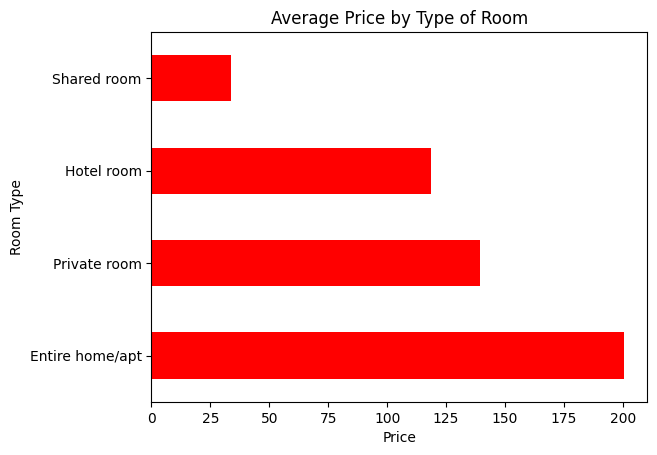

In [14]:
df.groupby("room_type")["price"].mean().sort_values(ascending=False).plot(kind="barh", color='red')
plt.xlabel('Price')
plt.ylabel('Room Type')
plt.title('Average Price by Type of Room')